In [1]:
#Load json file containing jazz songs as a dataframe to see what it looks like
import pandas as pd

with open("JazzStandards.json", "r") as file:
    data = pd.read_json(file)

data.head()

,Title,Composer,Rhythm,TimeSignature,Sections,Key
0,9.20 Special,Earl Warren,Medium Swing,4/4,"[{'Label': 'A', 'MainSegment': {'Chords': 'D9|...",NaN
1,26-2,John Coltrane,Medium Up Swing,4/4,"[{'Label': 'A', 'MainSegment': {'Chords': 'Fma...",F
2,52nd Street Theme,Thelonious Monk,Up Tempo Swing,4/4,"[{'Label': 'A', 'Repeats': 1, 'MainSegment': {...",NaN
3,500 Miles High,Chick Corea,Bossa Nova,4/4,[{'MainSegment': {'Chords': 'Em7|Em7|Gm7|Gm7|B...,Emin
4,502 Blues,Jimmy Rowles,Waltz,3/4,[{'MainSegment': {'Chords': 'Am7|Dbmaj7|Bm7b5|...,Amin


In [2]:
data.shape

(1382, 6)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1382 non-null   object
 1   Composer       1382 non-null   object
 2   Rhythm         1382 non-null   object
 3   TimeSignature  1371 non-null   object
 4   Sections       1382 non-null   object
 5   Key            1149 non-null   object
dtypes: object(6)
memory usage: 64.9+ KB


In [4]:
#Scrape song composition years from wikipedia using ChatGPT and compile as a list
#If no composition year available, release year is used
#If there is no wikipedia for the song, year is "na"
song_years = [1941, 1947, 1947, 1972, 1959, 'na', 1956, 1955, 1958, 1969, 1959, 1935, 1946, 1937, 1931, 1931, 1960, 1927, 1944, 1940, 1916, 1974, 1958, 1946, 1959, 1946, 1961, 1966, 1938, 1947, 1955, 1945, 1947, 1974, 1977, 1965, 1967, 1959, 1973, 1959, 1941, 1946, 1941, 1960, 1973, 1927, 1927, 1954, 1938, 1966, 1911, 1965, 1966, 1951, 1953, 1924, 1955, 1959, 1975, 1937, 1959, 1941, 1931, 1954, 1939, 1939, 1957, 1946, 1934, 1940, 1947, 1932, 'na', 1958, 1925, 1976, 1929, 1927, 1975, 'na', 1939, 1946, 1946, 1934, 1969, 1932, 1978, 'na', 1945, 1963, 1976, 1934, 1931, 1951, 1941, 1938, 1951, 1934, 1945, 1941, 1920, 1959, 1911, 1977, 1957, 1952, 1976, 1973, 'na', 1941, 1956, 1959, 1954, 1925, 'na', 1955, 1942, 1950, 1945, 1966, 1933, 1967, 1935, 1970, 1955, 1960, 1954, 1942, 1939, 1959, 1957, 1957, 1942, 1926, 1976, 1944, 1974, 1932, 1936, 1931, 1947, 1927, 1963, 1902, 1962, 1945, 1939, 1945, 1927, 1930, 1927, 1940, 1929, 1970, 1964, 1962, 1945, 1967, 1950, 1932, 1937, 1963, 1935, 1960, 1959, 1939, 1952, 1935, 1934, 1957, 1925, 1976, 1931, 1940, 1959, 1955, 1945, 1961, 1947, 1939, 1958, 1958, 1930, 1957, 1966, 1968, 1968, 1949, 1935, 1965, 1940, 1947, 1939, 1946, 1936, 1968, 1976, 1930, 1976, 1959, 1977, 1957, 1926, 1931, 1947, 1960, 1949, 'na', 1939, 1934, 1957, 1966, 1976, 1935, 1955, 1924, 1934, 1959, 1938, 1963, 1947, 1958, 1941, 1966, 1962, 1935, 1932, 1953, 1964, 1977, 1937, 1964, 1959, 1966, 1966, 1973, 1934, 1920, 1976, 1960, 1935, 'na', 1959, 1976, 1958, 1941, 1938, 1959, 1946, 1976, 1966, 1976, 1974, 1937, 1969, 1935, 1958, 1946, 1940, 1930, 1971, 1958, 1954, 1974, 1946, 1968, 1976, 1959, 1947, 1959, 1961, 1964, 1947, 1940, 1963, 1959, 'na', 1960, 1942, 1931, 1927, 1959, 1968, 1958, 1934, 1972, 1939, 1976, 1955, 1954, 1964, 1947, 1934, 1936, 1910, 1939, 1961, 1938, 1941, 1965, 1947, 'na', 1946, 1974, 1962, 1968, 1954, 1942, 1957, 1946, 1927, 1929, 1961, 1958, 1958, 1949, 1956, 1947, 1947, 1939, 1974, 1954, 1913, 1961, 1957, 1951, 1935, 1940, 1939, 1959, 1965, 1976, 'na', 1937, 1931, 1942, 1935, 1942, 1954, 1999, 1968, 1941, 1936, 1947, 1800, 1951, 1939, 1947, 1936, 1938, 1955, 1959, 1954, 1974, 1963, 1965, 1946, 1925, 1927, 1938, 1946, 1930, 1954, 1934, 1952, 1964, 1968, 1965, 1976, 1965, 1976, 1927, 1944, 1947, 1976, 1947, 1965, 1956, 1965, 1959, 1944, 1974, 1937, 1938, 1956, 1941, 1951, 1930, 1964, 1959, 1964, 1930, 1937, 1977, 1924, 1936, 1976, 1964, 1970, 1976, 1957, 1934, 1942, 1959, 1956, 1959, 1941, 1936, 1976, 1962, 1939, 1944, 1932, 1964, 1930, 1956, 'na', 1958, 1964, 1936, 1947, 1969, 1976, 1963, 1955, 1951, 1959, 1957, 1959, 1959, 1955, 1939, 1963, 1946, 1955, 1960, 1957, 1976, 1955, 1964, 1941, 1969, 1974, 1930, 1927, 1956, 1936, 1959, 1962, 1964, 1946, 1936, 1960, 1935, 1940, 1949, 'na', 1932, 1946, 1966, 1941, 1964, 1964, 1976, 1966, 1963, 1959, 1964, 1945, 'na', 1953, 1947, 1965, 1947, 1942, 1955, 1947, 1939, 1948, 1939, 1956, 1929, 1936, 1966, 1976, 1957, 1949, 1953, 'na', 1991, 1959, 1955, 'na', 1976, 1968, 1957, 1955, 'na', 1957, 1976, 1929, 1960, 1942, 1974, 1936, 1937, 1933, 1941, 1960, 1959, 1928, 1961, 1968, 1955, 1925, 1956, 1931, 1930, 1928, 1940, 1956, 1930, 1933, 1939, 1941, 1939, 1954, 'na', 1946, 1956, 1927, 1934, 1936, 1940, 1935, 1946, 1927, 1957, 1935, 1929, 1951, 1947, 1936, 1952, 1940, 1934, 1964, 1935, 1930, 1935, 1927, 1951, 1933, 1956, 1946, 1939, 1936, 1933, 'na', 1940, 1938, 1927, 1946, 1930, 1962, 1959, 1967, 1939, 1946, 1937, 1938, 1957, 1934, 1931, 1937, 1959, 1946, 1939, 1956, 1956, 1961, 1928, 1936, 1944, 1931, 1936, 1947, 1946, 1935, 1932, 1940, 1937, 1935, 1923, 1932, 1926, 1927, 1937, 1937, 1935, 1956, 1931, 1941, 1930, 1963, 1960, 1930, 1939, 1927, 'na', 1945, 1959, 1939, 1951, 'na', 1956, 1947, 1963, 1937, 1936, 1959, 1927, 1940, 1935, 1932, 1969, 1974, 1947, 1976, 1951, 1936, 1934, 1957, 1951, 1956, 'na', 1938, 1932, 1924, 1965, 1964, 1957, 1970, 1954, 1966, 'na', 1976, 1935, 1959, 'na', 1936, 1932, 1935, 1954, 1956, 1935, 1939, 1942, 1929, 1940, 1947, 1938, 'na', 1949, 1936, 'na', 1946, 1944, 1959, 1936, 1946, 1936, 1937, 1971, 'na', 1938, 1927, 1939, 1957, 1951, 1976, 'na', 'na', 'na', 'na', 1966, 1937, 1941, 1959, 1942, 1960, 1964, 1953, 1959, 1957, 1966, 1945, 1931, 1945, 1929, 1958, 'na', 1931, 1935, 1940, 1928, 1956, 1976, 1930, 1959, 'na', 1946, 1964, 1976, 1947, 1976, 1958, 1937, 1941, 1939, 1976, 1958, 1937, 1955, 1947, 1983, 1940, 1960, 1955, 1959, 1930, 1931, 'na', 'na', 'na', 1954, 1941, 'na', 1935, 1957, 1955, 1928, 1936, 1936, 1946, 1964, 1959, 1959, 1965, 1965, 1946, 1960, 'na', 1976, 1928, 1952, 1927, 1976, 1966, 1963, 'na', 1934, 1960, 'na', 1951, 1964, 1976, 1947, 1927, 1955, 1983, 1983, 'na', 1927, 1946, 1960, 1934, 1964, 1947, 1976, 1960, 'na', 1940, 1936, 1932, 1927, 1936, 'na', 1927, 1930, 1933, 1930, 1964, 1933, 1953, 1932, 1939, 1935, 1959, 'na', 1939, 1976, 1965, 1960, 1930, 1959, 1935, 1964, 1959, 1927, 1945, 1959, 1966, 1940, 'na', 1966, 'na', 'na', 1931, 1957, 1964, 1976, 1927, 1966, 1963, 'na', 1939, 1959, 1957, 1958, 1947, 'na', 1976, 'na', 'na', 1955, 'na', 1953, 'na', 1948, 1954, 1964, 1957, 1955, 1949, 1962, 1947, 1930, 1941, 1949, 1958, 1961, 1965, 1968, 1968, 1942, 1944, 'na', 1939, 1962, 1946, 1945, 1929, 1964, 1965, 1935, 1926, 1949, 1959, 1930, 1922, 1959, 1949, 1937, 1938, 1927, 1933, 1937, 'na', 1946, 1929, 1935, 1912, 1934, 1953, 1935, 1953, 1943, 1941, 1978, 1969, 'na', 1959, 1942, 1958, 'na', 1948, 1938, 1967, 1954, 1960, 1931, 1985, 1977, 1956, 1960, 1937, 'na', 1932, 1964, 1958, 1942, 1955, 1943, 1957, 1946, 1921, 1959, 1984, 1945, 1939, 1953, 1964, 1963, 1968, 1947, 1924, 1943, 1941, 1927, 1957, 1957, 1946, 1938, 1954, 1965, 1966, 1957, 1947, 1963, 1947, 1957, 1933, 1936, 1965, 1930, 1962, 1964, 1964, 1962, 1945, 1930, 1930, 1961, 1966, 'na', 1962, 1953, 1950, 1946, 1946, 1934, 1931, 1946, 1939, 1934, 1962, 1956, 1939, 1959, 1948, 1956, 1963, 1946, 1954, 1960, 1972, 1955, 1967, 1961, 1933, 1961, 1955, 1934, 1964, 1946, 1942, 1935, 1942, 1959, 1958, 1956, 1977, 1936, 1959, 1963, 1954, 1959, 1944, 1940, 1916, 1976, 1938, 1959, 1944, 1947, 1966, 1973, 1974, 1957, 1951, 1958, 1933, 1950, 1964, 1990, 1969, 'na', 1973, 1954, 1974, 1962, 1959, 1970, 1944, 1953, 1964, 1947, 1966, 1947, 1964, 1947, 1930, 1957, 1925, 1930, 1944, 1946, 1947, 1957, 1937, 1928, 1968, 1973, 1944, 1960, 1958, 1955, 1964, 1958, 1959, 1952, 1976, 'na', 1949, 1946, 1978, 1961, 1950, 1956, 1953, 1955, 1946, 1931, 1938, 1967, 1968, 1959, 1960, 1952, 1939, 1963, 1965, 1945, 1932, 1929, 1958, 1976, 1957, 1964, 1963, 1976, 1946, 1946, 1959, 1952, 1941, 1947, 1946, 1962, 1959, 1933, 1934, 1972, 1961, 1944, 1967, 1966, 1964, 1959, 1971, 1930, 1954, 1930, 1949, 1955, 1957, 1941, 1924, 1959, 1944, 1931, 1969, 1929, 1950, 1964, 1974, 1972, 1930, 1957, 1932, 1933, 1966, 1957, 1957, 1959, 1972, 1967, 1930, 1964, 1976, 1957, 1935, 1919, 1917, 1959, 1955, 1929, 1927, 1938, 1957, 1934, 1944, 1965, 1926, 1933, 1966, 1957, 1962, 1948, 1966, 1939, 1927, 1974, 1917, 1949, 1960, 1929, 'na', 1963, 1969, 1957, 1968, 1966, 1935, 'na', 1962, 1946, 1943, 1963, 'na', 1930, 1970, 1926, 1930, 1932, 1960, 1963, 1956, 1954, 1959, 1939, 1943, 1944, 'na', 1925, 1954, 1978, 1949, 1946, 1957, 1937, 1940, 1944, 1957, 1953, 1966, 1948, 1924, 1999, 1962, 1939, 1946, 1927, 1935, 1930, 1933, 1934, 1937, 1937, 1914, 1946, 1941, 1946, 1952, 1937, 1965, 1962, 1957, 1946, 1968, 1941, 1937, 1927, 1966, 1933, 1936, 1957, 1940, 1957, 1957, 1930, 1964, 1946, 1959, 'na', 1947, 1960, 1966, 1957, 1961, 1926, 1956, 1936, 1951, 1957, 1937, 1936, 1954, 'na', 'na', 'na', 1958, 1978, 1953, 1954, 1965, 'na', 1933, 1953, 1974, 1957, 1957, 1966, 1962, 1976, 1938, 1968, 1921, 1934, 1951, 1964, 1963, 1978, 1962, 1963, 1957, 1962, 1946, 1960, 1934, 1947, 1967, 1977, 1941, 1973, 1955, 1931, 1960, 1957, 1960, 1941, 1964, 1967, 1963, 1936, 'na', 1953, 1974, 1953, 1947, 1951, 1973, 1960, 1950, 1935, 1963, 1940, 1969, 1931, 1927, 1957, 1952, 'na', 1931, 1956, 1954, 1914, 1941, 1940, 1934, 1931, 1955, 1936, 1939, 1955, 1964, 1927, 1909, 1927, 1934, 1967, 1932, 1935, 1964, 1964, 1956, 1939, 1939, 1929, 1963, 1941, 1966, 1957, 'na', 1931, 1946, 1964, 1941, 1933, 1941, 1930, 1947, 'na', 1930, 1939, 1931, 1934, 1930, 1946, 1914, 1955, 1969, 1936, 1928, 1936, 1946, 1934, 1934, 1974, 1937, 1934, 1936, 1949, 1930, 1935, 1940, 1954, 1909, 1928, 1967, 1965]

In [5]:
#Create a Year column in our dataframe from our web-scraped list
data['Year'] = song_years

In [6]:
data.head()

,Title,Composer,Rhythm,TimeSignature,Sections,Key,Year
0,9.20 Special,Earl Warren,Medium Swing,4/4,"[{'Label': 'A', 'MainSegment': {'Chords': 'D9|...",NaN,1941
1,26-2,John Coltrane,Medium Up Swing,4/4,"[{'Label': 'A', 'MainSegment': {'Chords': 'Fma...",F,1947
2,52nd Street Theme,Thelonious Monk,Up Tempo Swing,4/4,"[{'Label': 'A', 'Repeats': 1, 'MainSegment': {...",NaN,1947
3,500 Miles High,Chick Corea,Bossa Nova,4/4,[{'MainSegment': {'Chords': 'Em7|Em7|Gm7|Gm7|B...,Emin,1972
4,502 Blues,Jimmy Rowles,Waltz,3/4,[{'MainSegment': {'Chords': 'Am7|Dbmaj7|Bm7b5|...,Amin,1959


In [7]:
#save this dataframe as song_data
song_data = data

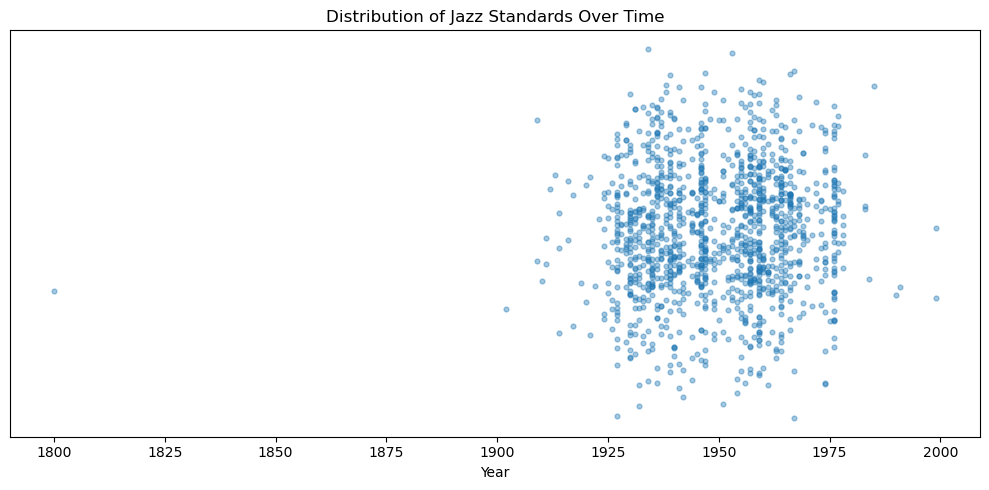

In [8]:
#plot songs by year composed/released

import matplotlib.pyplot as plt
import numpy as np

song_years_df = song_data.copy()
song_years_df['Year'] = pd.to_numeric(song_years_df['Year'], errors='coerce')
song_years_df = song_years_df.dropna(subset=['Year'])

plt.figure(figsize=(10, 5))

# jitter y-values so points don't overlap
y_jitter = np.random.normal(0, 0.3, len(song_years_df))

plt.scatter(song_years_df['Year'], y_jitter, alpha=0.4, s=12)
plt.xlabel("Year")
plt.title("Distribution of Jazz Standards Over Time")
plt.yticks([])  # hide y-axis (since songs aren’t ordered)
plt.tight_layout()
plt.show()

In [9]:
#create new dataframe with one row per chord by splitting sections into individual chords

with open("JazzStandards.json", "r") as file:
    data = json.load(file)

master_chord_list = []

for i, song in enumerate(data):
    title = song.get("Title")
    composer = song.get("Composer")
    key = song.get("Key", "")
    rhythm = song.get("Rhythm")
    time_signature = song.get("TimeSignature")
    sections = song.get("Sections")
    year = song_years[i]  

    chord_counter = 0  

    for section in sections:
        label = section.get("Label")
        main_segment = section.get("MainSegment")
        chord_str = main_segment.get("Chords")
        endings = section.get("Endings", [])
        for ending in endings:
            chord_str += ("|" + ending.get("Chords"))
    
        measures = chord_str.split('|')

        for measure_ind, measure in enumerate(measures):
            chords = measure.split(",")
            for chord in chords:
                master_chord_list.append({
                    "Title": title,
                    "Composer": composer,
                    "Key": key,
                    "Rhythm": rhythm,
                    "Time Signature": time_signature,
                    "Section": label,
                    "Measure": measure_ind,
                    "Chord Index": chord_counter,
                    "Chord": chord.strip(),
                    "Year": year
                })
                chord_counter += 1 

df = pd.DataFrame(master_chord_list)

In [10]:
df.iloc[30:41]

,Title,Composer,Key,Rhythm,Time Signature,Section,Measure,Chord Index,Chord,Year
30,9.20 Special,Earl Warren,,Medium Swing,4/4,A,5,30,C7,1941
31,9.20 Special,Earl Warren,,Medium Swing,4/4,A,5,31,B7,1941
32,9.20 Special,Earl Warren,,Medium Swing,4/4,A,5,32,Bb7,1941
33,9.20 Special,Earl Warren,,Medium Swing,4/4,A,5,33,A7,1941
34,9.20 Special,Earl Warren,,Medium Swing,4/4,A,6,34,D9,1941
35,9.20 Special,Earl Warren,,Medium Swing,4/4,A,7,35,G7,1941
36,9.20 Special,Earl Warren,,Medium Swing,4/4,A,7,36,C6,1941
37,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,0,Fmaj7,1947
38,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,1,Ab7,1947
39,26-2,John Coltrane,F,Medium Up Swing,4/4,A,1,2,Dbmaj7,1947


In [11]:
# Each row in the DataFrame represents a single chord. 
# Notice that when the DataFrame reaches a new song (e.g. row 37), 
# the "Chord Index" resets to 0 while all other metadata remains consistent for each chord.
# Sections and Measures change properly as well

In [12]:
#install music21 package to help add a column for roman numeral analysis
!pip install music21

In [13]:
#songs without a key have no roman numeral mappings
#peak at the first song with a key to see the roman numeral analysis
df.iloc[35:45]

,Title,Composer,Key,Rhythm,Time Signature,Section,Measure,Chord Index,Chord,Year
35,9.20 Special,Earl Warren,,Medium Swing,4/4,A,7,35,G7,1941
36,9.20 Special,Earl Warren,,Medium Swing,4/4,A,7,36,C6,1941
37,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,0,Fmaj7,1947
38,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,1,Ab7,1947
39,26-2,John Coltrane,F,Medium Up Swing,4/4,A,1,2,Dbmaj7,1947
40,26-2,John Coltrane,F,Medium Up Swing,4/4,A,1,3,E7,1947
41,26-2,John Coltrane,F,Medium Up Swing,4/4,A,2,4,Amaj7,1947
42,26-2,John Coltrane,F,Medium Up Swing,4/4,A,2,5,C7,1947
43,26-2,John Coltrane,F,Medium Up Swing,4/4,A,3,6,Cm7,1947
44,26-2,John Coltrane,F,Medium Up Swing,4/4,A,3,7,F7,1947


In [14]:
# I don't think chatgpt did a good job finding the years so I will be more methodical:

%pip install wikipedia beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [15]:
import wikipedia
import requests
import re
from bs4 import BeautifulSoup

In [19]:
def get_wikipedia_page(title):
    try:
        search_results = wikipedia.search(title)
        if not search_results:
            return None, None

        page_title = search_results[0]
        page = wikipedia.page(page_title, auto_suggest=False)
        return page.url, page.html()

    except wikipedia.DisambiguationError as e:
        # Try the first non-disambiguation option
        try:
            page = wikipedia.page(e.options[0])
            return page.url, page.html()
        except:
            return None, None

    except Exception:
        return None, None
        
def extract_year_from_infobox(html):
    soup = BeautifulSoup(html, "html.parser")
    infobox = soup.find("table", class_="infobox")

    if not infobox:
        return None

    for row in infobox.find_all("tr"):
        header = row.find("th")
        data = row.find("td")

        if not header or not data:
            continue

        label = header.text.strip().lower()

        if any(key in label for key in ["written", "published", "composed"]):
            years = re.findall(r"\b(?:18|19|20)\d{2}\b", data.text)
            if years:
                return int(years[0])

    return None


def extract_year_from_lead(html):
    soup = BeautifulSoup(html, "html.parser")
    paragraphs = soup.find_all("p")

    for p in paragraphs[:3]:
        years = re.findall(r"\b(?:18|19|20)\d{2}\b", p.text)
        if years:
            return int(years[0])

    return None


def get_song_year(title):
    url, html = get_wikipedia_page(title)

    if html is None:
        return {
            "year": None,
            "source": None,
            "confidence": "none"
        }

    year = extract_year_from_infobox(html)
    if year:
        return {
            "year": year,
            "source": url,
            "confidence": "high"
        }

    year = extract_year_from_lead(html)
    if year:
        return {
            "year": year,
            "source": url,
            "confidence": "medium"
        }

    return {
        "year": None,
        "source": url,
        "confidence": "low"
    }


In [16]:
song_data.head()

,Title,Composer,Rhythm,TimeSignature,Sections,Key,Year
0,9.20 Special,Earl Warren,Medium Swing,4/4,"[{'Label': 'A', 'MainSegment': {'Chords': 'D9|...",NaN,1941
1,26-2,John Coltrane,Medium Up Swing,4/4,"[{'Label': 'A', 'MainSegment': {'Chords': 'Fma...",F,1947
2,52nd Street Theme,Thelonious Monk,Up Tempo Swing,4/4,"[{'Label': 'A', 'Repeats': 1, 'MainSegment': {...",NaN,1947
3,500 Miles High,Chick Corea,Bossa Nova,4/4,[{'MainSegment': {'Chords': 'Em7|Em7|Gm7|Gm7|B...,Emin,1972
4,502 Blues,Jimmy Rowles,Waltz,3/4,[{'MainSegment': {'Chords': 'Am7|Dbmaj7|Bm7b5|...,Amin,1959


In [20]:
years = []

batch_size = 50
for i, title in enumerate(song_data["Title"][:100], 1):
    result = get_song_year(title)
    years.append(result)
    
    if i % batch_size == 0:
        pd.DataFrame(years).to_csv(f"../song_years/song_years_{i}.csv", index=False)

/opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [21]:
# continue from previous run
start = len(years) + 1   # should be 101

batch_size = 50
for i, title in enumerate(song_data["Title"][100:300], start):
    result = get_song_year(title)
    years.append(result)
    
    if i % batch_size == 0:
        pd.DataFrame(years).to_csv(
            f"../song_years/song_years_{i}.csv",
            index=False
        )

/opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [24]:
years = pd.read_csv("../song_years/song_years_300.csv")
years["Title"] = song_data["Title"][:len(years)]
years.head()

,year,source,confidence,Title
0,1941.0,https://en.wikipedia.org/wiki/9:20_Special,medium,9.20 Special
1,1960.0,https://en.wikipedia.org/wiki/26-2,medium,26-2
2,NaN,https://en.wikipedia.org/wiki/List_of_composit...,low,52nd Street Theme
3,1972.0,https://en.wikipedia.org/wiki/500_Miles_High,medium,500 Miles High
4,1958.0,https://en.wikipedia.org/wiki/502_Blues,medium,502 Blues


In [25]:
# continue from previous run (years is a DataFrame)
start = len(years) + 1   # should now be 301

batch_size = 50
new_rows = []

for i, title in enumerate(song_data["Title"][300:500], start):
    result = get_song_year(title)

    # add title column
    result["Title"] = title

    new_rows.append(result)

    if i % batch_size == 0:
        # append new rows to years DataFrame
        years = pd.concat([years, pd.DataFrame(new_rows)], ignore_index=True)

        # save cumulative progress
        years.to_csv(
            f"../song_years/song_years_{i}.csv",
            index=False
        )

        new_rows = []  # reset batch


/opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [26]:
# continue from previous run (years is a DataFrame)
start = len(years) + 1 

batch_size = 50
new_rows = []

for i, title in enumerate(song_data["Title"][500:800], start):
    result = get_song_year(title)

    # add title column
    result["Title"] = title

    new_rows.append(result)

    if i % batch_size == 0:
        # append new rows to years DataFrame
        years = pd.concat([years, pd.DataFrame(new_rows)], ignore_index=True)

        # save cumulative progress
        years.to_csv(
            f"../song_years/song_years_{i}.csv",
            index=False
        )

        new_rows = []  # reset batch

/opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [27]:
# continue from previous run (years is a DataFrame)
start = len(years) + 1 

batch_size = 50
new_rows = []

for i, title in enumerate(song_data["Title"][800:1100], start):
    result = get_song_year(title)

    # add title column
    result["Title"] = title

    new_rows.append(result)

    if i % batch_size == 0:
        # append new rows to years DataFrame
        years = pd.concat([years, pd.DataFrame(new_rows)], ignore_index=True)

        # save cumulative progress
        years.to_csv(
            f"../song_years/song_years_{i}.csv",
            index=False
        )

        new_rows = []  # reset batch

/opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [28]:
# continue from previous run (years is a DataFrame)
start = len(years) + 1 

batch_size = 50
new_rows = []

for i, title in enumerate(song_data["Title"][1100:], start):
    result = get_song_year(title)

    # add title column
    result["Title"] = title

    new_rows.append(result)

    if i % batch_size == 0:
        # append new rows to years DataFrame
        years = pd.concat([years, pd.DataFrame(new_rows)], ignore_index=True)

        # save cumulative progress
        years.to_csv(
            f"../song_years/song_years_{i}.csv",
            index=False
        )

        new_rows = []  # reset batch

years.to_csv('../song_years/song_years_all.csv', index=False)

/opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/anaconda3/lib/python3.13/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


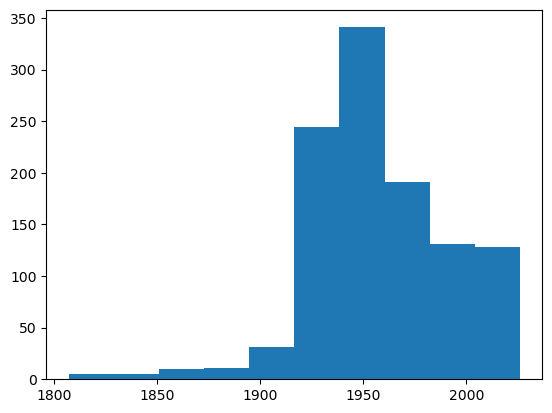

In [35]:
plt.hist(years['year'])
plt.show()

In [36]:
pd.value_counts(years['year']>1990)

/var/folders/r0/mxnnbvln7wl__9w60hwgw01c0000gn/T/ipykernel_11181/2148894970.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(years['year']>1990)


year
False    1142
True      208
Name: count, dtype: int64

In [37]:
# cross referenced from this source:
# https://en.wikipedia.org/wiki/List_of_jazz_standards

wiki_source_ref = {
    # Pre-1920
    "Careless Love": 1900,
    "St. James Infirmary Blues": 1900,
    "When the Saints Go Marching In": 1900,
    "High Society": 1901,
    "Bill Bailey (Won't You Please Come Home)": 1902,
    "Chinatown, My Chinatown": 1910,
    "Some of These Days": 1910,
    "Alexander's Ragtime Band": 1911,
    "The Memphis Blues": 1912,
    "Ballin' the Jack": 1913,
    "St. Louis Blues": 1914,
    "That's a Plenty": 1914,
    "Twelfth Street Rag": 1914,
    "I Ain't Got Nobody": 1915,
    "Weary Blues": 1915,
    "Beale Street Blues": 1916,
    "Li'l Liza Jane": 1916,
    "Darktown Strutters' Ball": 1917,
    "Indiana": 1917,
    "Rose Room": 1917,
    "Tiger Rag": 1917,

    # 1920s
    "Avalon": 1920,
    "Margie": 1920,
    "The Jazz Me Blues": 1921,
    "The Sheik of Araby": 1921,
    "Bugle Call Rag": 1922,
    "China Boy": 1922,
    "Farewell Blues": 1922,
    "I Wish I Could Shimmy Like My Sister Kate": 1922,
    "Charleston": 1923,
    "Tin Roof Blues": 1923,
    "Everybody Loves My Baby": 1924,
    "Fascinating Rhythm": 1924,
    "Hard Hearted Hannah (The Vamp of Savannah)": 1924,
    "How Come You Do Me Like You Do?": 1924,
    "I'll See You in My Dreams": 1924,
    "King Porter Stomp": 1924,
    "The Man I Love": 1924,
    "Oh, Lady Be Good!": 1924,
    "Riverboat Shuffle": 1924,
    "Somebody Loves Me": 1924,
    "Dinah": 1925,
    "Don't Bring Lulu": 1925,
    "I Want to Be Happy": 1925,
    "Squeeze Me": 1925,
    "Sweet Georgia Brown": 1925,
    "Tea for Two": 1925,
    "Big Butter and Egg Man": 1926,
    "Bye Bye Blackbird": 1926,
    "'Deed I Do": 1926,
    "I Can't Believe That You're in Love with Me": 1926,
    "If I Could Be with You (One Hour Tonight)": 1926,
    "I've Found a New Baby": 1926,
    "Muskrat Ramble": 1926,
    "Someone to Watch Over Me": 1926,
    "Sugar": 1926,
    "Blue Skies": 1927,
    "'S Wonderful": 1927,
    "Basin Street Blues": 1928,
    "Crazy Rhythm": 1928,
    "Creole Love Call": 1928,
    "I Can't Give You Anything but Love, Baby": 1928,
    "If I Had You": 1928,
    "Lover, Come Back to Me": 1928,
    "Nagasaki": 1928,
    "Softly, As in a Morning Sunrise": 1928,
    "Sweet Lorraine": 1928,
    "Ain't Misbehavin'": 1929,
    "Black and Blue": 1929,
    "Honeysuckle Rose": 1929,
    "Just You, Just Me": 1929,
    "Liza (All the Clouds'll Roll Away)": 1929,
    "Mean to Me": 1929,
    "More Than You Know": 1929,
    "Rockin' Chair": 1929,
    "Stardust": 1929,
    "What Is This Thing Called Love?": 1929,

    # 1930s
    "Body and Soul": 1930,
    "But Not for Me": 1930,
    "Confessin' (That I Love You)": 1930,
    "Embraceable You": 1930,
    "Exactly Like You": 1930,
    "Georgia on My Mind": 1930,
    "I Got Rhythm": 1930,
    "Lazy River": 1930,
    "Memories of You": 1930,
    "Mood Indigo": 1930,
    "On the Sunny Side of the Street": 1930,
    "All of Me": 1931,
    "Beautiful Love": 1931,
    "I Surrender Dear": 1931,
    "Just Friends": 1931,
    "Out of Nowhere": 1931,
    "When It's Sleepy Time Down South": 1931,
    "When Your Lover Has Gone": 1931,
    "Alone Together": 1932,
    "April in Paris": 1932,
    "How Deep Is the Ocean? (How High Is the Sky?)": 1932,
    "I Don't Stand a Ghost of a Chance with You": 1932,
    "It Don't Mean a Thing (If It Ain't Got That Swing)": 1932,
    "Sophisticated Lady": 1933,
    "Smoke Gets in Your Eyes": 1933,
    "Stardust": 1933,
    "Summertime": 1935,
    "I Can't Get Started": 1935,
    "Caravan": 1936,
    "Stompin' at the Savoy": 1936,
    "There Is No Greater Love": 1936,
    "The Way You Look Tonight": 1936,
    "A Foggy Day": 1937,
    "Have You Met Miss Jones?": 1937,
    "My Funny Valentine": 1937,
    "Our Love Is Here to Stay": 1937,
    "Cherokee": 1938,
    "Prelude to a Kiss": 1938,
    "The Nearness of You": 1938,
    "All the Things You Are": 1939,
    "Darn That Dream": 1939,
    "I Thought About You": 1939,
    "Take the 'A' Train": 1939,
    "What's New?": 1939,

    # 1940s
    "After Hours": 1940,
    "All Too Soon": 1940,
    "Cotton Tail": 1940,
    "Do Nothing till You Hear from Me": 1940,
    "Don't Get Around Much Anymore": 1940,
    "How High the Moon": 1940,
    "In a Mellow Tone": 1940,
    "Polka Dots and Moonbeams": 1940,
    "You Stepped Out of a Dream": 1940,
    "Aquarela do Brasil": 1941,
    "Blues in the Night": 1941,
    "Chelsea Bridge": 1941,
    "Flamingo": 1941,
    "I Got It Bad (and That Ain't Good)": 1941,
    "I Hear a Rhapsody": 1941,
    "I'll Remember April": 1941,
    "Jim": 1941,
    "Just A‑Sittin' and A‑Rockin'": 1941,
    "Just Squeeze Me (But Please Don't Tease Me)": 1941,
    "Salt Peanuts": 1941,
    "Take the 'A' Train": 1941,
    "Why Don't You Do Right?": 1941,
    "You Don't Know What Love Is": 1941,
    "C Jam Blues": 1942,
    "Epistrophy": 1942,
    "Lover Man (Oh, Where Can You Be?)": 1942,
    "A Night in Tunisia": 1942,
    "Perdido": 1942,
    "Skylark": 1942,
    "That Old Black Magic": 1942,
    "There Will Never Be Another You": 1942,
    "Things Ain't What They Used to Be": 1942,
    "Woody 'n' You": 1942,
    "Harlem Nocturne": 1943,
    "Star Eyes": 1943,
    "The Surrey with the Fringe on Top": 1943,
    "Ev'ry Time We Say Goodbye": 1944,
    "Groovin' High": 1944,
    "I Fall in Love Too Easily": 1944,
    "I Should Care": 1944,
    "It Could Happen to You": 1944,
    "Long Ago (and Far Away)": 1944,
    "'Round Midnight": 1944,
    "Stella by Starlight": 1944,
    "Well, You Needn't": 1944,
    "Billie's Bounce": 1945,
    "Everything but You": 1945,
    "Hot House": 1945,
    "I'm Just a Lucky So-and-So": 1945,
    "It Might as Well Be Spring": 1945,
    "Laura": 1945,
    "Now's the Time": 1945,
    "Since I Fell for You": 1945,
    "I'll Close My Eyes": 1945,
    "Angel Eyes": 1946,
    "Anthropology": 1946,
    "Come Rain or Come Shine": 1946,
    "Confirmation": 1946,
    "Day Dream": 1946,
    "Do You Know What It Means to Miss New Orleans": 1946,
    "If You Could See Me Now": 1946,
    "Nobody Else But Me": 1946,
    "Ornithology": 1946,
    "Tenderly": 1946,
    "The Things We Did Last Summer": 1946,
    "Yardbird Suite": 1946,
    "Autumn Leaves": 1947,
    "But Beautiful": 1947,
    "C'est si bon": 1947,
    "Donna Lee": 1947,
    "In Walked Bud": 1947,
    "Lady Bird": 1947,
    "Nature Boy": 1947,
    "On Green Dolphin Street": 1947,
    "Our Delight": 1947,
    "Scrapple from the Apple": 1947,
    "Detour Ahead": 1948,
    "Four Brothers": 1948,
    "The Night Has a Thousand Eyes": 1948,
    "Lush Life": 1949,
    "My Foolish Heart": 1949,

    # Post-1950
    "If I Were a Bell": 1950,
    "Au Privave": 1951,
    "Blues for Alice": 1951,
    "Birks' Works": 1951,
    "Night Train": 1951,
    "Straight, No Chaser": 1951,
    "Bags' Groove": 1952,
    "Lullaby of Birdland": 1952,
    "My One and Only Love": 1952,
    "That's All": 1952,
    "When I Fall in Love": 1952,
    "Here's That Rainy Day": 1953,
    "Jordu": 1953,
    "Minority": 1953,
    "Airegin": 1954,
    "All of You": 1954,
    "Blue Monk": 1954,
    "Django": 1954,
    "Doxy": 1954,
    "Fly Me to the Moon": 1954,
    "Four": 1954,
    "Joy Spring": 1954,
    "Misty": 1954,
    "Oleo": 1954,
    "Solar": 1954,
    "In Your Own Sweet Way": 1955,
    "Canadian Sunset": 1956,
    "Con Alma": 1956,
    "Nica's Dream": 1956,
    "St. Thomas": 1956,
    "Waltz for Debby": 1956,
    "Whisper Not": 1956,
    "Blue Train": 1957,
    "I Remember Clifford": 1957,
    "Li'l Darlin'": 1957,
    "Soul Eyes": 1957,
    "Chega de Saudade": 1958,
    "Milestones": 1958,
    "Moanin'": 1958,
    "Vishnu": 1958,
    "Afro Blue": 1959,
    "All Blues": 1959,
    "The Best Is Yet to Come": 1959,
    "Blue in Green": 1959,
    "Desafinado": 1959,
    "Freddie Freeloader": 1959,
    "Giant Steps": 1959,
    "Countdown": 1959,
    "Goodbye Pork Pie Hat": 1959,
    "Goodbye Tristesse": 1959,
    "Killer Joe": 1959,
    "Manhã de Carnaval": 1959,
    "Mr. P.C.": 1959,
    "My Favorite Things": 1959,
    "Naima": 1959,
    "Nostalgia in Times Square": 1959,
    "The Sidewinder": 1959,
    "So What": 1959,
    "Take Five": 1959,
    "Jeannine": 1960,
    "Impressions": 1961,
    "Once I Loved": 1961,
    "One Note Samba": 1961,
    "Stolen Moments": 1961,
    "Corcovado": 1962,
    "Days of Wine and Roses": 1962,
    "Meditation": 1962,
    "Up Jumped Spring": 1962,
    "Blue Bossa": 1963,
    "Bluesette": 1963,
    "The Girl from Ipanema": 1963,
    "How Insensitive": 1963,
    "If You Never Come to Me": 1963,
    "Oye Como Va": 1963,
    "Recorda Me": 1963,
    "Só Danço Samba": 1963,
    "Water to Drink": 1963,
    "Watermelon Man": 1963,
    "Cantaloupe Island": 1964,
    "Inner Urge": 1964
}


In [15]:
#save df to directory
df.to_csv('song_data_by_chord.csv', index=False)

In [16]:
#save song data (not by chord) separately
song_data.to_csv('song_data.csv', index=False)